In [ ]:
#Homework 3
#John Mayer

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
#Importing the dataset for analysis
df = pd.read_csv(r"C:\Users\John\Data-Science\Homework\Unit3\data\housing.csv")

In [ ]:
#Encoding is not necessary as all of the data values are numeric

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#Boston Housing Dataset Summary

#CRIM: per capita crime rate by town.
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town.
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
#NOX: nitrogen oxides concentration (parts per 10 million).
#RM: average number of rooms per dwelling.
#AGE: proportion of owner-occupied units built prior to 1940.
#DIS: weighted mean of distances to five Boston employment centres.
#RAD: index of accessibility to radial highways.
#TAX: full-value property-tax rate per \$10,000.
#PTRATIO: pupil-teacher ratio by town.
#BLACK: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
#LSTAT: lower status of the population (percent).
#PRICE: median value of owner-occupied homes in \$1000s

In [5]:
#Attempting to plot all pairplots at once wasn't working. I elected to plot three at a time.

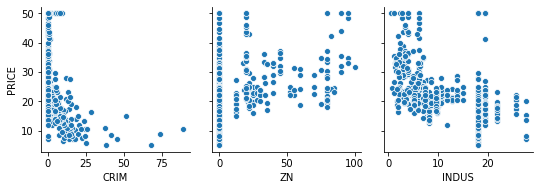

In [6]:
sns.pairplot(df,x_vars=['CRIM','ZN','INDUS'],y_vars=['PRICE'])

In [ ]:
#These plots display potentially noisy observations that may skew the
#results of the model.

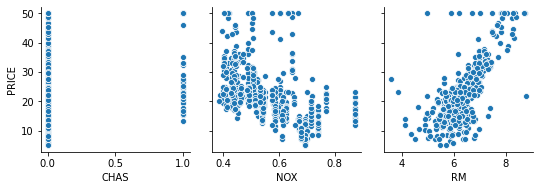

In [7]:
sns.pairplot(df,x_vars=['CHAS','NOX','RM'],y_vars=['PRICE'])

In [ ]:
#There is a noticable positive correlation between 'RM' and 'PRICE'

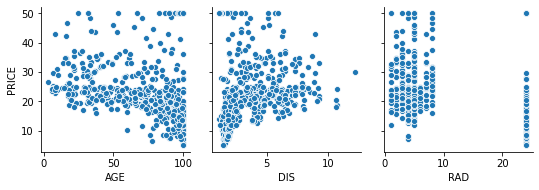

In [8]:
sns.pairplot(df,x_vars=['AGE','DIS','RAD'],y_vars=['PRICE'])

In [ ]:
#More noisy observations

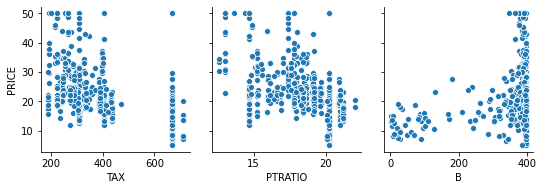

In [9]:
sns.pairplot(df,x_vars=['TAX','PTRATIO','B'],y_vars=['PRICE'])

In [ ]:
#More noisy observations

In [10]:
#splitting up the dataframe
X=df.drop('PRICE', axis=1)
y=df['PRICE']

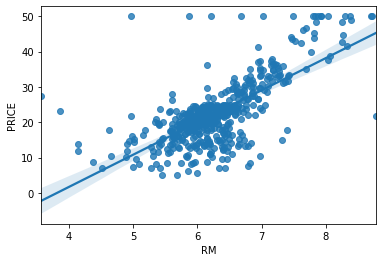

In [11]:
sns.regplot(df['RM'],df['PRICE'])

In [ ]:
#This displays the positive correlation between 'RM' and 'PRICE'

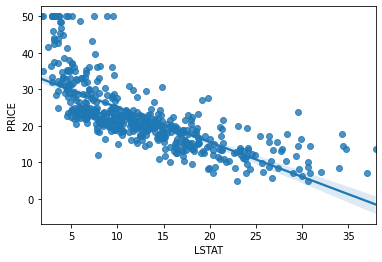

In [12]:
sns.regplot(df['LSTAT'],df['PRICE'])

In [ ]:
#This displays the negative correlation between 'LSTAT' and 'PRICE'

In [14]:
#creating the test and training sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.20)

In [15]:
#initialize the algorithm
regressor = xgb.XGBRegressor()

In [16]:
#Fit the training data (default parameters)
regressor.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
#Getting feature importances on default parameters
importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
12,LSTAT,0.478342
5,RM,0.275815
4,NOX,0.057355
10,PTRATIO,0.055407
7,DIS,0.038212
9,TAX,0.025559
0,CRIM,0.022236
2,INDUS,0.012130
11,B,0.010791
6,AGE,0.010732


In [18]:
#Getting predicted values based on test data
ypred=regressor.predict(Xtest)

In [19]:
#Display predicted values
ypred

array([44.389763, 44.031998, 25.736132, 27.261005, 24.826202, 24.929945,
       25.944603, 31.238276, 16.482048, 33.502094, 25.44321 , 15.384025,
       11.518673, 31.0583  , 31.699553, 21.39167 , 17.263088, 10.482781,
       25.53876 , 32.27131 , 12.264836, 21.577581, 23.967371, 11.723339,
       18.335695, 29.770525, 11.126374, 14.984931, 19.533823, 25.436152,
       13.617226, 27.912674, 20.421482, 17.91368 , 19.013376, 20.052078,
       13.071548, 21.985495, 19.022581, 20.228157, 37.067215, 24.32192 ,
       22.680586, 12.374684, 16.992088, 25.01956 , 22.268232, 43.75237 ,
       23.810238, 19.818699, 32.600895, 22.186407, 14.249579, 13.359582,
       20.28198 , 23.395327, 36.503674,  9.182031, 20.216497, 23.116592,
       29.722265, 11.844846, 21.346361, 23.19691 , 20.644346, 17.564726,
       29.679174, 26.667341, 21.447784, 33.29953 , 21.218292, 21.833187,
       32.413517, 32.73106 , 24.038616, 10.112127, 12.06104 , 19.263151,
       44.264183, 23.412163, 24.143536, 19.160578, 

In [20]:
#Display error
mean_squared_error(ytest,ypred)

9.998017973942593

In [21]:
#Cross validation score
accuracies=cross_val_score(estimator=regressor,X=Xtrain,y=ytrain,cv=10)

In [22]:
#Display accuracy of the model
accuracies.mean()

0.8309267099785173

In [23]:
#Initialize figure for partial dependence plot
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [24]:
#Create the partial dependence plot
plot_partial_dependence(regressor,X,['LSTAT'],fig=fig)

C:\Users\John\anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


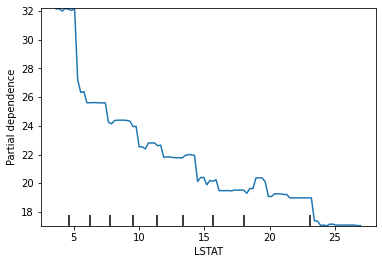

In [25]:
#Displaying the partial dependence plot
fig

In [26]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [27]:
plot_partial_dependence(regressor,X,['RM'],fig=fig)

C:\Users\John\anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


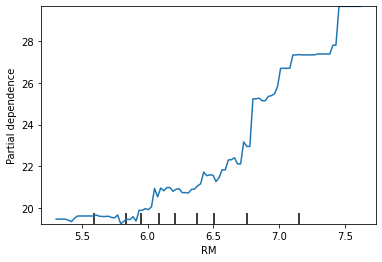

In [28]:
#Display another partial dependence plot for variable 'RM'
fig

In [29]:
#Changing parameters and running again

In [30]:
#Varying parameters
n_estimators = [300,350,400]
learning_rate = [.2]
max_depth = [4,5,6]
gamma = [.9,1]

cv_scores = []

for estimators in n_estimators:
    for rate in learning_rate:
        for depth in max_depth:
            for g in gamma:
                #print(f"Fitting model for: estimators: {estimators}, learning rate: {rate}, max depth: {depth}")
                regressor.set_params(n_estimators=estimators, learning_rate=rate, max_depth=depth, gamma=g)
                regressor.fit(Xtrain, ytrain)
                cv_scores.append((regressor.score(Xtest, ytest), estimators, rate, depth, g))
#Display scores
cv_scores            

[(0.9030438294473092, 300, 0.2, 4, 0.9),
 (0.8982422325945348, 300, 0.2, 4, 1),
 (0.8897340535843499, 300, 0.2, 5, 0.9),
 (0.885059187783468, 300, 0.2, 5, 1),
 (0.8748963163686743, 300, 0.2, 6, 0.9),
 (0.8724964207266936, 300, 0.2, 6, 1),
 (0.9030438294473092, 350, 0.2, 4, 0.9),
 (0.8982422325945348, 350, 0.2, 4, 1),
 (0.8897340535843499, 350, 0.2, 5, 0.9),
 (0.885059187783468, 350, 0.2, 5, 1),
 (0.8748963163686743, 350, 0.2, 6, 0.9),
 (0.8724964207266936, 350, 0.2, 6, 1),
 (0.9030438294473092, 400, 0.2, 4, 0.9),
 (0.8982422325945348, 400, 0.2, 4, 1),
 (0.8897340535843499, 400, 0.2, 5, 0.9),
 (0.885059187783468, 400, 0.2, 5, 1),
 (0.8748963163686743, 400, 0.2, 6, 0.9),
 (0.8724964207266936, 400, 0.2, 6, 1)]

In [32]:
#Set parameters based on above
regressor.set_params(n_estimators=300,learning_rate=0.2,max_depth=6,gamma=0.9)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.9, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
#Fit training data based on selected parameters
regressor.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.9, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
#New feature importances with new parameters
importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
12,LSTAT,0.503555
5,RM,0.272740
4,NOX,0.057663
0,CRIM,0.035238
7,DIS,0.030537
10,PTRATIO,0.024328
2,INDUS,0.014193
6,AGE,0.014096
9,TAX,0.013275
11,B,0.012326


In [35]:
#New predictions
ypred=regressor.predict(Xtest)

In [36]:
#Display predictions
ypred

array([44.68244  , 43.958263 , 25.692451 , 27.624304 , 18.79795  ,
       22.198286 , 26.153976 , 29.35528  , 16.72435  , 35.458366 ,
       25.302197 , 15.961989 , 12.353385 , 30.547548 , 32.443283 ,
       21.713404 , 15.541578 ,  9.609346 , 25.314827 , 36.42043  ,
       11.465098 , 20.94173  , 25.281013 ,  9.608552 , 18.661434 ,
       30.232048 , 10.921351 , 14.2425585, 19.797783 , 25.809244 ,
       11.304181 , 27.497145 , 20.174126 , 18.290087 , 19.663168 ,
       19.618822 , 12.518724 , 21.999884 , 20.834965 , 20.553633 ,
       35.946133 , 24.347036 , 22.092905 , 12.342103 , 16.35868  ,
       26.207397 , 22.095411 , 41.04994  , 21.599707 , 20.083715 ,
       33.620552 , 22.060453 , 15.6065645, 15.00936  , 18.861097 ,
       24.091183 , 35.639687 ,  8.490054 , 20.574047 , 22.343908 ,
       28.073957 , 10.386889 , 21.232578 , 24.389584 , 21.706297 ,
       20.104288 , 27.806362 , 27.30053  , 21.230532 , 33.042015 ,
       20.452595 , 21.660994 , 33.035137 , 32.897533 , 23.4877

In [37]:
ytest

161    50.0
233    48.3
296    27.1
325    24.6
365    27.5
       ... 
315    16.2
28     18.4
61     16.0
360    25.0
109    19.4
Name: PRICE, Length: 102, dtype: float64

In [38]:
#New mean squared error
mean_squared_error(ytest,ypred)

9.254302821676495

In [39]:
#New cross validation
accuracies=cross_val_score(estimator=regressor,X=Xtrain,y=ytrain,cv=10)

In [40]:
#New accuracy
accuracies.mean()

0.8399690927240673

In [41]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [42]:
plot_partial_dependence(regressor,X,['LSTAT'],fig=fig)

C:\Users\John\anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


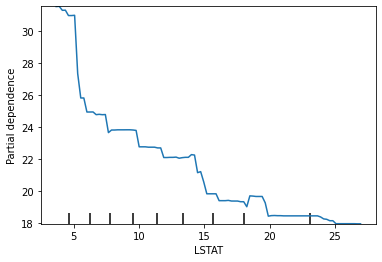

In [43]:
fig

In [44]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [45]:
plot_partial_dependence(regressor,X,['RM'],fig=fig)

C:\Users\John\anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


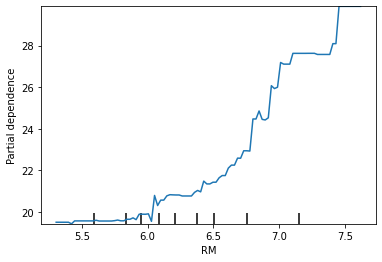

In [46]:
fig